Student Name: Gerard Kerley
Student ID: 18195229

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10

In [3]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


### MyPCA implementation

In [4]:
class MyPCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, data):
        """fit method
        
        """
        # Calculate means
        self.data_means = np.mean(data, axis=0)
        
        # Center data
        self.data_centered = data - self.data_means
        
        # Calculate covariance
        data_covariance = np.cov(self.data_centered,rowvar=False)
        
        # get eigen values and vectors
        eigvals, eigvecs = eig(data_covariance)        

        #sort eigenvalues
        #indices_sorted = np.square(eigvals).argsort()[::-1]
        indices_sorted = np.abs(eigvals).argsort()[::-1]   
        eigenvalues_sorted = eigvals[indices_sorted]
        eigenvectors_sorted = eigvecs.T[:,indices_sorted]

        self.eigenvalues = eigenvalues_sorted[:self.n_components]
        self.eigenvectors = eigenvectors_sorted[:, :self.n_components]
   
    def transform(self, data):
        """projection of data
            
        """
        return np.dot(self.data_centered, self.eigenvectors.T)
            

In [5]:
my_pca = MyPCA(2)
my_pca_fit = my_pca.fit(data)
my_pca_transform = my_pca.transform(data)

### Compare fit method output with sklearn fit

In [6]:
pca = PCA(n_components=2)
pca.fit(data)

print("Scikit Learn PCA\n********************")
print("sklearn eigenvalues: \n{}\n".format(pca.explained_variance_))
print("sklearn eigenvectors: \n{}\n".format(pca.components_))

print("Custom PCA\n********************")
print("eigenvalues: \n{}\n".format(my_pca.eigenvalues))
print("eigenvectors: \n{}\n".format(my_pca.eigenvectors))

Scikit Learn PCA
********************
sklearn eigenvalues: 
[6.10912190e+02 3.48067033e-01]

sklearn eigenvectors: 
[[ 0.23695359  0.97152097]
 [-0.97152097  0.23695359]]

Custom PCA
********************
eigenvalues: 
[6.10912190e+02 3.48067033e-01]

eigenvectors: 
[[ 0.23695359 -0.97152097]
 [-0.97152097 -0.23695359]]



The eigen values match those from Scikit Learn.<br>
The eigen vectors magnitudes also match but the signs are reverse for two of the values.<br>
I have seen discussions about polarity reversal in some PCA implementations but I wasn't able to get mine to be exactly the same.<br>

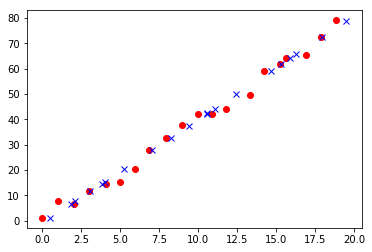

In [7]:
# Reduce dimensions to n = 1
pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)

# Plot data
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()